<center>
    
    Activation Functions
    
    Author: Daniel Coble
</center>

We've covered a lot of data processing which can be classified as "linear." The Fourier transform and filters are linear, linear regression is obviously linear. But the world, sadly, is nonlinear, and so if models are to be accurate, then they also have to be nonlinear. In neural networks, that nonlinearity is created using activation functions. There are two important criteria of an activation function: (1) that it is nonlinear; and (2) that it is differentiable. Many activation functions have been proposed, but to keep it simple we'll focus on the two most common: ReLU and the sigmoid function. The rectified linear unit (ReLU) function is a very simple piecewise linear function:
$$ \text{ReLU}(x)=\cases{0 \quad x<0 \\ x \quad x \geq 0} $$
It's derivative is the unit step function, also called the Heaviside function.
$$ \frac{d}{dx}\text{ReLU}(x) = \cases{0 \quad x<0 \\ 1 \quad x \geq 0} $$
The sigmoid function is
$$ \sigma(x) = \frac{1}{1+e^{-x}} $$
and it's derivative is
$$ \frac{d}{dx}\sigma(x) = \frac{e^{-x}}{\left(1+e^{-x}\right)^2} $$
In this notebook, we'll play around with activation functions, plotting them and their derivatives. Let's start just by plotting these two functions.

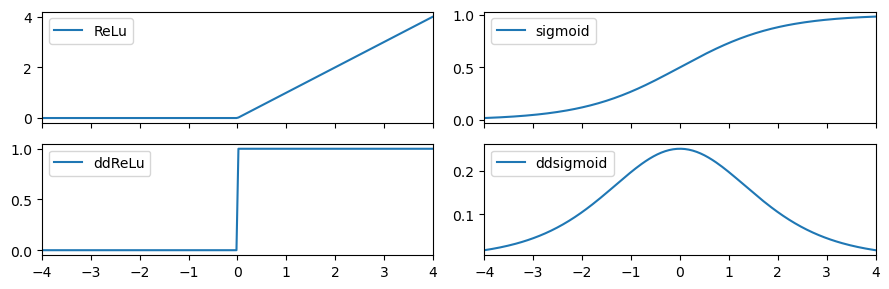

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# I wrote relu and ddrelu in a weird way. It may be a useful exersize to unpack how they work.
def relu(x):
    return (x>=0)*x

def ddrelu(x):
    return 1.0*(x>=0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def ddsigmoid(x):
    return np.exp(-x)/(1+np.exp(-x))**2

x_range=[-4,4]
x_axis = np.linspace(x_range[0], x_range[1], num=200)


fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(9, 3), sharex=True, sharey=False)
ax1.plot(x_axis, relu(x_axis), label='ReLu')
ax1.legend(loc=2)
ax2.plot(x_axis, sigmoid(x_axis), label='sigmoid')
ax2.legend(loc=2)
ax3.plot(x_axis, ddrelu(x_axis), label='ddReLU')
ax3.legend(loc=2)
ax4.plot(x_axis, ddsigmoid(x_axis), label='ddsigmoid')
ax4.legend(loc=2)
ax2.set_xlim(x_range)
fig.tight_layout()

Now let's play around with creating more complicated functions out of the activation functions. Let's make something that looks like a neural network layer. We'll define the three constants $\{a_i\}$, $\{b_i\}$, and $\{c_i\}$. Then our made-up function will be
$$ f(x) = \sum_{i=1}^n a_i\text{ReLU}(bx_i+c_i) $$
and we'll do likewise for $\sigma$. There's no purpose here but messing around. Try to create some interesting shapes.

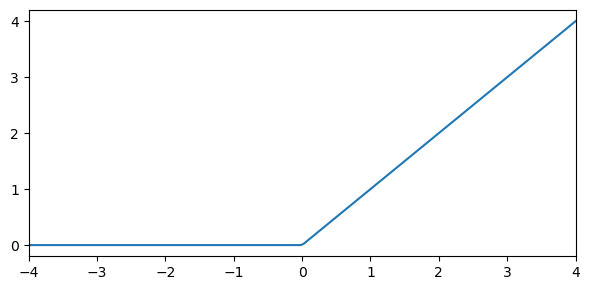

In [30]:
'''these values create one normal ReLU. Try messing with just the a_1, b_1, and c_1 first to understand
how they affect one function before doing the sum.'''
a = np.array([1, 0, 0, 0, 0])
b = np.array([1, 0, 0, 0, 0])
c = np.array([0, 0, 0, 0, 0])

def f(x):
    y = 0
    for i in range(a.size):
        y += a[i]*relu(b[i]*x+c[i])
    return y

y = f(x_axis)

plt.figure(figsize=(6,3))
plt.plot(x_axis, y)
plt.xlim((x_range))
plt.tight_layout()

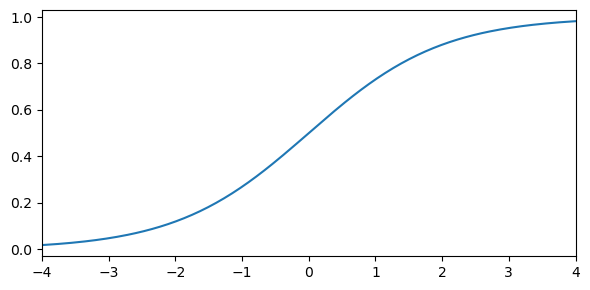

In [31]:
'''Here's the same code for sigmoid. '''
a = np.array([1, 0, 0, 0, 0])
b = np.array([1, 0, 0, 0, 0])
c = np.array([0, 0, 0, 0, 0])

def f(x):
    y = 0
    for i in range(a.size):
        y += a[i]*sigmoid(b[i]*x+c[i])
    return y

y = f(x_axis)

plt.figure(figsize=(6,3))
plt.plot(x_axis, y)
plt.xlim((x_range))
plt.tight_layout()

Let's use the activation functions to approximate an unknown function. We'll do this with linear regression. For each point in time, features can be generated by sampling from a time-shifted sigmoid function.
$$ f_\tau = \sigma(x-\tau) $$
Below the feature array is generated.

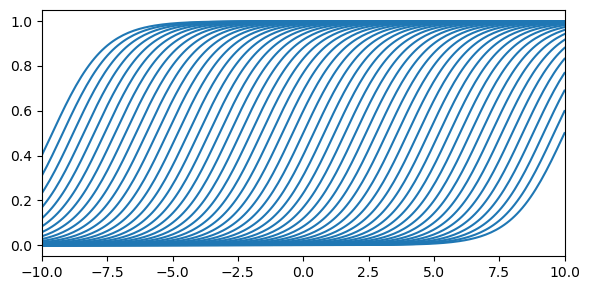

In [35]:
n_features=50
n_points = 200
x_axis = np.linspace(-10, 10, num=n_points, endpoint=True)

dtau = 2*10/n_features
tau = 10

X = np.zeros((n_points, n_features))
for i in range(n_features):
    X[:,i] = sigmoid(x_axis-tau)
    tau -= dtau

# plot all the feature functions
plt.figure(figsize=(6,3))
for i in range(n_features):
    plt.plot(x_axis, X[:,i], c='tab:blue')
plt.xlim((-10, 10))
plt.tight_layout()

**Challenge Problem**

I've created a function in blackbox.py and imported it here. We don't know its closed form but can sample from it. Sample from $f$ evenly between -10 and 10. Then do a linear fit against the $f_\tau$ features. The results you get can be used to create an approximating function.
$$\hat{f}(x) = \sum_{i=0}^na_n\sigma(x-\tau_n) $$

Experiment changing the number of features, sampled points, and between sigmoid and ReLU and make some qualitative observations about the results.

In [32]:
from blackbox import f